## Changing K

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import utils.helpers2 as h
import utils.tests as t
from IPython import display

%matplotlib inline

In [22]:
h.simulate_data?

Signature: h.simulate_data(n=500, features=10, centroids=3)
Docstring:
Simulates n data points, each with number of features equal to features, with a number of centers equal to centroids
INPUT (defaults)
    n = number of rows (500)
    features = number of columns (10)
    centroids = number of centers (3)
Output
    dataset = a dataset with the the specified characteristics
File:      c:\users\ongch\apps\ml\udacity\ml_tf\04_unsupervised_learning\helpers2.py
Type:      function


In [21]:
data = h.simulate_data(n=200, features=5, centroids=4)
print('Dataset loaded has shape: ', data.shape)

t.test_question_1(data)

Dataset loaded has shape:  (200, 5)
Looks good!  Continue!


In [5]:
k_value = 4

t.test_question_2(k_value)

That's right!  The value of k is the same as the number of centroids used to create your dataset.


Let's try a few different values for **k** and fit them to our data using **KMeans**.

To use KMeans, you need to follow three steps:

**I.** Instantiate your model.

**II.** Fit your model to the data.

**III.** Predict the labels for the data.

KMeans(n_clusters=4)
KMeans(n_clusters=4)
[2 0 0 2 0 0 0 1 3 0 3 1 1 0 0 0 2 2 3 2 1 3 3 1 2 1 1 0 0 3 2 3 3 3 1 3 1
 0 1 3 2 2 3 3 1 3 0 1 3 2 3 2 3 3 1 0 1 3 1 1 2 3 1 0 2 2 1 2 3 1 2 3 3 3
 3 3 3 2 2 3 1 1 2 1 0 2 3 2 0 2 3 1 1 2 1 0 0 0 0 0 3 0 3 3 2 1 0 2 3 3 0
 2 0 1 2 2 1 1 2 2 2 2 1 2 1 0 2 0 1 3 3 0 1 0 0 3 3 0 0 1 0 0 0 3 3 2 2 0
 0 1 1 1 2 3 3 0 3 0 2 2 0 3 2 0 3 1 0 1 2 1 1 0 3 2 1 2 1 1 0 2 2 1 0 1 0
 3 1 2 2 3 1 1 2 2 0 0 2 3 1 0]


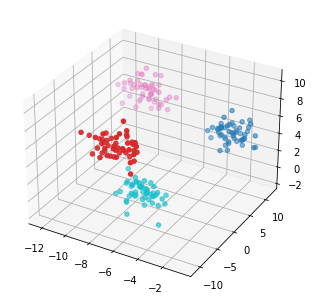

In [18]:
# instantiating a model with 4 centers
kmeans_4 = KMeans(4)
print(kmeans_4)

# fit the model to the data
model_4 = kmeans_4.fit(data)
print(model_4)

# predict the labels on the data to show category the points belong to
labels_4 = model_4.predict(data)
print(labels_4)

# plot data colored by center
h.plot_data(data, labels_4)

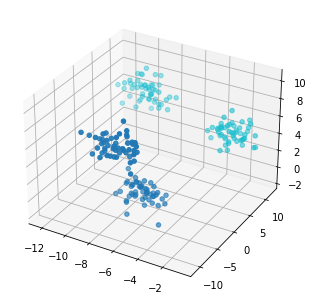

In [10]:
kmeans_2 = KMeans(2)
model_2 = kmeans_2.fit(data)
labels_2 = model_2.predict(data)
h.plot_data(data, labels_2)

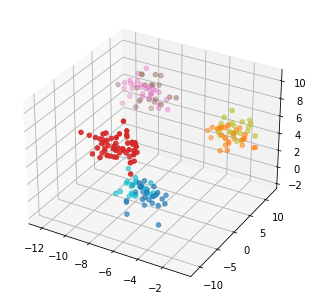

In [11]:
kmeans_7 = KMeans(7)
model_7 = kmeans_7.fit(data)
labels_7 = model_7.predict(data)
h.plot_data(data, labels_7)

Visually, we get some indication of how well our model is doing, but it isn't totally apparent. Each time additional centers are considered, the distances between the points and the center will decrease.  However, at some point, that decrease is not substantial enough to suggest the need for an additional cluster.  

Using a scree plot is a common method for understanding if an additional cluster center is needed.  The elbow method used by looking at a scree plot is still pretty subjective, but let's take a look to see how many cluster centers might be indicated.
_________

Once you have **fit** a kmeans model to some data in sklearn, there is a **score** method, which takes the data.  This score is an indication of how far the points are from the centroids.  By fitting models for centroids from 1-10, and keeping track of the score and the number of centroids, you should be able to build a scree plot.  

This plot should have the number of centroids on the x-axis, and the absolute value of the score result on the y-axis.  You can see the plot I retrieved by running the solution code.  Try creating your own scree plot, as you will need it for the final questions.

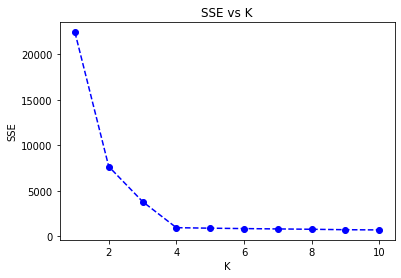

In [23]:
def generate_scree_plot(data, k_range=10):
    centers = np.arange(k_range) + 1
    scores = []

    for n in centers:
        kmeans = KMeans(n)
        model = kmeans.fit(data)
        labels = model.predict(data)
        score = model.score(data)
        scores.append(abs(score))
    
    plt.plot(centers, scores, linestyle='--', marker='o', color='b')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.title('SSE vs K')
    plt.show()

generate_scree_plot(data)


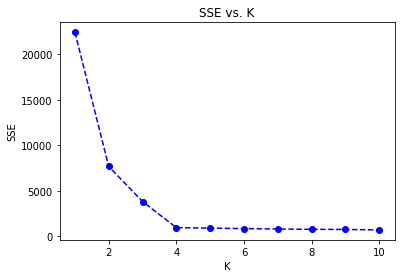

In [24]:
# given solution
centers, scores = h.fit_mods()

# Plot should look similar to the below
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSE vs. K');

In [17]:
value_for_k = 4

display.HTML(t.test_question_7(value_for_k))

That's right!  We set up the data with 4 centers, and the plot is consistent!  We can see a strong leveling off after 4 clusters, which suggests 4 clusters should be used.
